## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [6]:
data = pd.read_csv('Titanic_train.csv')
print(data.describe())
print(data.info())
print(data.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

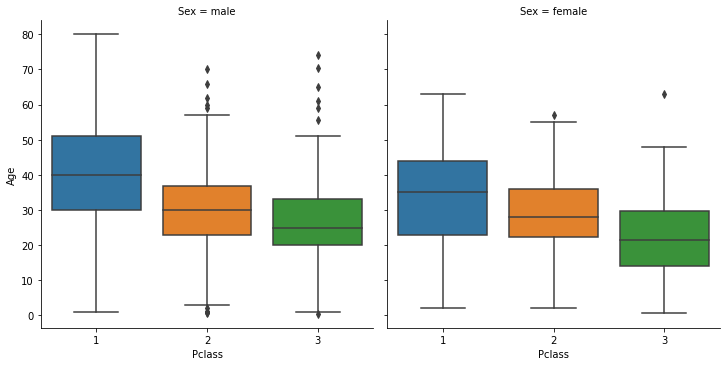

In [9]:
sns.catplot(data=data, x='Pclass', y='Age', col='Sex', kind='box')

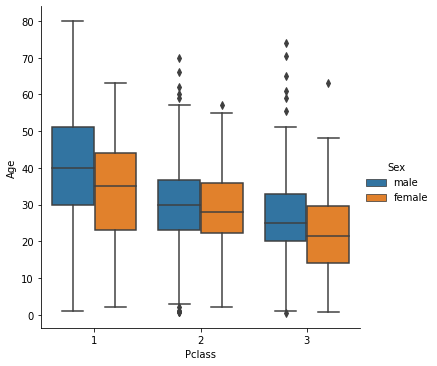

In [14]:
sns.catplot(data=data, x='Pclass', y='Age', hue='Sex', kind='box')

In [ ]:
Age與Pclass有關聯, Pclass=1 年紀較大, Pclass=2 次之, Pclass=3 較小
Age與Sex有關聯, 男性年紀比較大

## 觀察 Age

In [19]:
data[data['Age'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])

new_data = data[['Pclass','Sex','Age']]
new_data

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


In [40]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_filled = pd.DataFrame(imputer.fit_transform(new_data))

display(df_filled)

,0,1,2
0,3.0,1.0,22.000
1,1.0,0.0,38.000
2,3.0,0.0,26.000
3,1.0,0.0,35.000
4,3.0,1.0,35.000
...,...,...,...
886,2.0,1.0,27.000
887,1.0,0.0,19.000
888,3.0,0.0,16.075
889,1.0,1.0,26.000


In [33]:
print(data[data['Age'].isnull()==True][['Pclass','Sex','Age']])
print()
nan_index = data[data['Age'].isnull()==True][['Pclass','Sex','Age']].index
print(df_filled.iloc[nan_index])

     Pclass  Sex  Age
5         3    1  NaN
17        2    1  NaN
19        3    0  NaN
26        3    1  NaN
28        3    0  NaN
..      ...  ...  ...
859       3    1  NaN
863       3    0  NaN
868       3    1  NaN
878       3    1  NaN
888       3    0  NaN

[177 rows x 3 columns]

       0    1          2
5    3.0  1.0  19.666667
17   2.0  1.0  45.000000
19   3.0  0.0  19.000000
26   3.0  1.0  19.666667
28   3.0  0.0  19.000000
..   ...  ...        ...
859  3.0  1.0  19.666667
863  3.0  0.0  19.000000
868  3.0  1.0  19.666667
878  3.0  1.0  19.666667
888  3.0  0.0  19.000000

[177 rows x 3 columns]


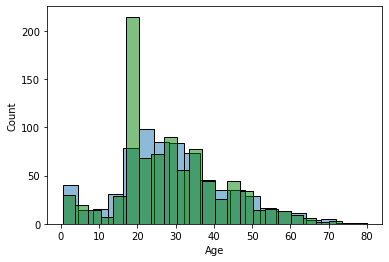

In [39]:
sns.histplot(data=new_data['Age'], alpha=0.5)
sns.histplot(data=df_filled.iloc[:,2],alpha=0.5, color='g')